In [ ]:
# Importing dependencies
import pandas as pd
import numpy as np

import tensorflow as tf
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, OrdinalEncoder

from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import matplotlib as plt
import seaborn as sns

In [ ]:
mortgage_merged = pd.read_csv('https://raw.githubusercontent.com/rparikh16/Data-Analysis-Project---Group-12/main/Canada_Mortgages_filtered.csv')
mortgage_merged.head()

,Unnamed: 0,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,0,0.3550,219191.50,0.314292
1,1,0.3500,231196.75,0.290257
2,2,0.3525,247453.25,0.274011
3,3,0.3500,266337.50,0.279614
4,4,0.3125,279651.75,0.248447


In [ ]:
mortgage_merged.columns

Index(['Unnamed: 0', 'Mortgage_delinquency_rate', 'Average_Value_New_Loans',
       'Residential_Mortgage_Arrears_Rates'],
      dtype='object')

In [ ]:
mortgage_merged = mortgage_merged.drop('Unnamed: 0', axis=1).reset_index(drop=True)
mortgage_merged

,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,0.3550,219191.50,0.314292
1,0.3500,231196.75,0.290257
2,0.3525,247453.25,0.274011
3,0.3500,266337.50,0.279614
4,0.3125,279651.75,0.248447
5,0.2875,277114.00,0.243891
6,0.2950,276762.25,0.200000
7,0.4675,282466.25,0.418389
8,0.3625,298145.00,0.306694
9,0.3400,304252.50,0.274545


In [ ]:
market_indicators_merged = pd.read_csv('https://raw.githubusercontent.com/rparikh16/Data-Analysis-Project---Group-12/main/Housing_Indicators_cleaned-2.csv')
market_indicators_merged.head()

,Unnamed: 0,Unnamed: 0.1,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposable_Income_Percent_Change
0,7,7,2013,64600,0.938292,66.458333,7.100000,3.182510
1,8,8,2014,66300,1.906636,65.991667,6.900000,1.224499
2,9,9,2015,66400,1.125241,65.850000,6.900000,3.360780
3,10,10,2016,66100,1.428760,65.700000,7.000000,3.197338
4,11,11,2017,68100,1.673978,66.659848,7.045455,3.197338


In [ ]:
market_indicators_merged = market_indicators_merged.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis=1).reset_index(drop=True)
market_indicators_merged

,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposable_Income_Percent_Change
0,2013,64600,0.938292,66.458333,7.100000,3.182510
1,2014,66300,1.906636,65.991667,6.900000,1.224499
2,2015,66400,1.125241,65.850000,6.900000,3.360780
3,2016,66100,1.428760,65.700000,7.000000,3.197338
4,2017,68100,1.673978,66.659848,7.045455,3.197338
5,2018,68400,1.673978,66.659848,7.045455,3.197338
6,2019,69300,1.673978,66.659848,7.045455,3.197338
7,2013,87500,1.436254,73.141667,4.600000,4.933587
8,2014,88400,2.566755,72.716667,4.700000,3.715266
9,2015,87900,1.153555,73.016667,6.000000,2.837896


In [ ]:
final_cleaned_dataset = pd.concat([market_indicators_merged, mortgage_merged], axis=1)
final_cleaned_dataset.head()

,Years,Real_Median_Household_Income,Consumer_Price_Index_Percent_Change,Labour_Force_Participation_Rate,Unemployment_Rate,Real_Disposable_Income_Percent_Change,Mortgage_delinquency_rate,Average_Value_New_Loans,Residential_Mortgage_Arrears_Rates
0,2013,64600,0.938292,66.458333,7.100000,3.182510,0.3550,219191.50,0.314292
1,2014,66300,1.906636,65.991667,6.900000,1.224499,0.3500,231196.75,0.290257
2,2015,66400,1.125241,65.850000,6.900000,3.360780,0.3525,247453.25,0.274011
3,2016,66100,1.428760,65.700000,7.000000,3.197338,0.3500,266337.50,0.279614
4,2017,68100,1.673978,66.659848,7.045455,3.197338,0.3125,279651.75,0.248447


In [ ]:
final_cleaned_dataset.to_csv('final_cleaned_data.csv', index=False)

In [ ]:
corrdf=final_cleaned_dataset.apply(LabelEncoder().fit_transform)
sc = StandardScaler()
corrdf = sc.fit_transform(corrdf)
corrdf=pd.DataFrame(data=corrdf,columns=final_cleaned_dataset.columns)
corr=corrdf.corr()['Mortgage_delinquency_rate']
corr[np.argsort(corr,axis=0)[::-1]]

Mortgage_delinquency_rate                 1.000000
Residential_Mortgage_Arrears_Rates        0.964244
Real_Disposable_Income_Percent_Change     0.308583
Labour_Force_Participation_Rate           0.117530
Real_Median_Household_Income             -0.141039
Unemployment_Rate                        -0.141934
Consumer_Price_Index_Percent_Change      -0.162176
Years                                    -0.239036
Average_Value_New_Loans                  -0.351025
Name: Mortgage_delinquency_rate, dtype: float64

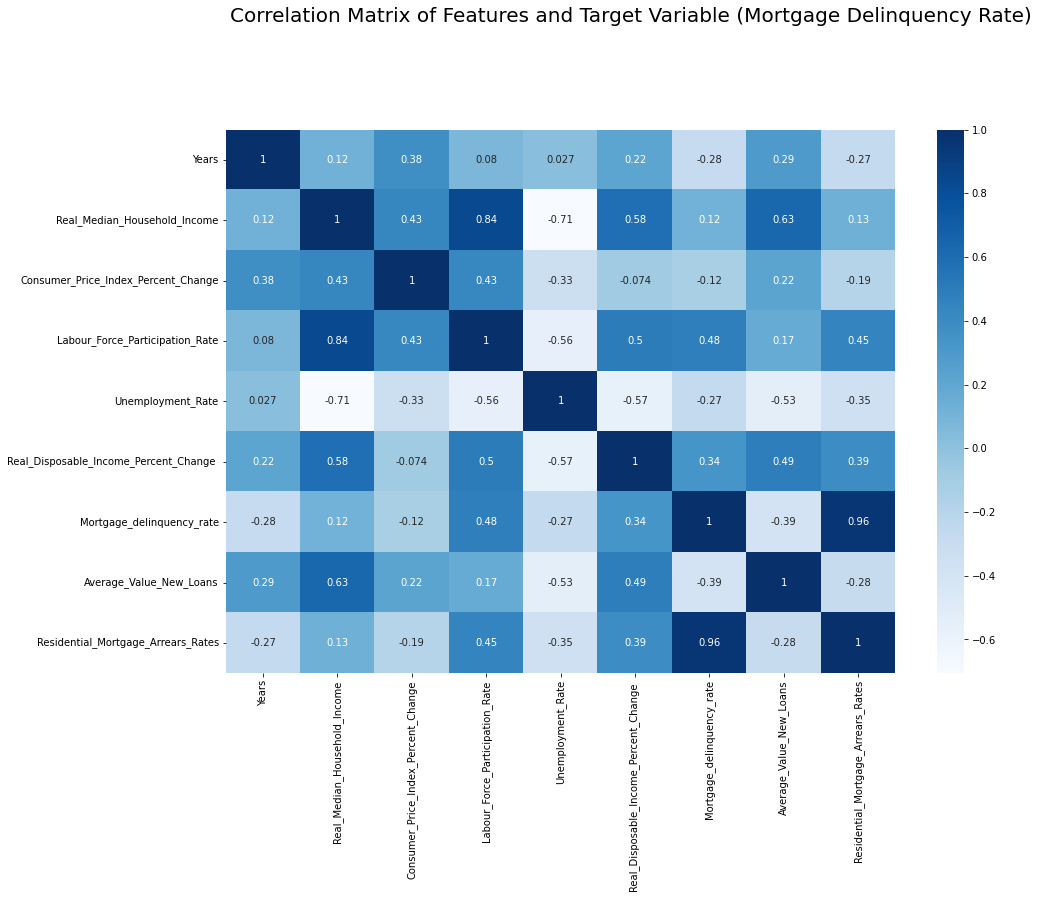

In [163]:
import matplotlib.pyplot as plt
import seaborn as sns
# Calculate the correlation matrix
corr = final_cleaned_dataset.corr()
plt.figure(figsize=(15,10))
# Plot the heat map
sns.heatmap(corr, cmap="Blues", annot=True)

# Add title
plt.suptitle('Correlation Matrix of Features and Target Variable (Mortgage Delinquency Rate)', fontsize=20, y=1.05)

# Show the plot
plt.show()

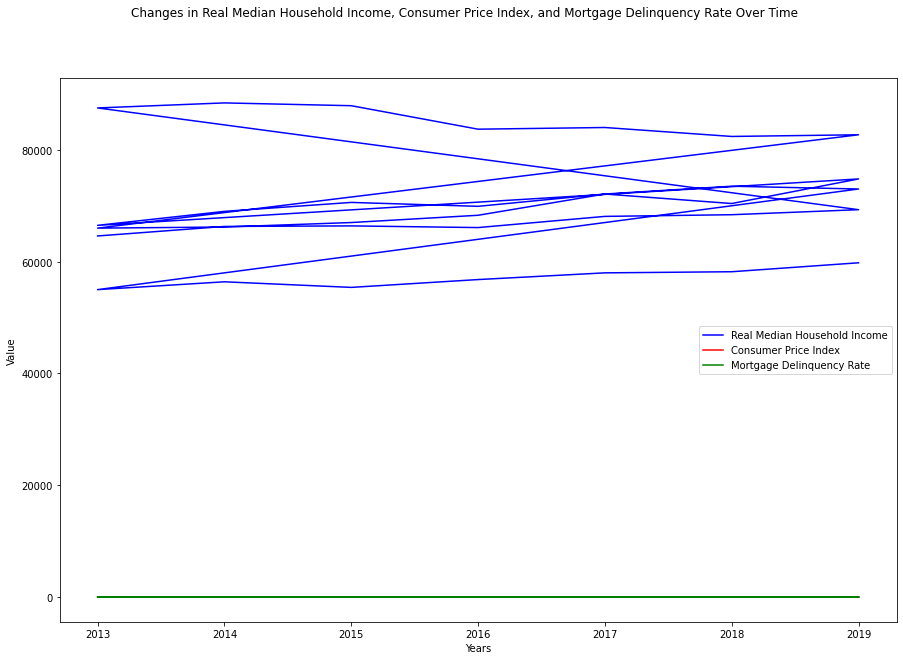

In [162]:
plt.figure(figsize=(15, 10))

# Plot the line charts
plt.plot(final_cleaned_dataset['Years'], final_cleaned_dataset['Real_Median_Household_Income'], label='Real Median Household Income', color= "Blue")
plt.plot(final_cleaned_dataset['Years'], final_cleaned_dataset['Consumer_Price_Index_Percent_Change'], label='Consumer Price Index', color= "red")
plt.plot(final_cleaned_dataset['Years'], final_cleaned_dataset['Mortgage_delinquency_rate'], label='Mortgage Delinquency Rate', color= "green")

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Value')
plt.suptitle('Changes in Real Median Household Income, Consumer Price Index, and Mortgage Delinquency Rate Over Time')


plt.legend(loc='right')

# Show the plot
plt.show()

In [ ]:
import plotly.express as px
# Create a scatter plot with the hover text showing the mortgage delinquency rate
fig = px.scatter(final_cleaned_dataset, x="Real_Median_Household_Income",y="Consumer_Price_Index_Percent_Change",
                 size='Mortgage_delinquency_rate', color='Mortgage_delinquency_rate', 
                 hover_data=["Mortgage_delinquency_rate"])

# Set the size and title of the plot
fig.update_layout(width=1000, height=500, title="Scatter plot of Real Median Household Income vs Consumer Price Index Percent Change")

# Show the plot
fig.show()

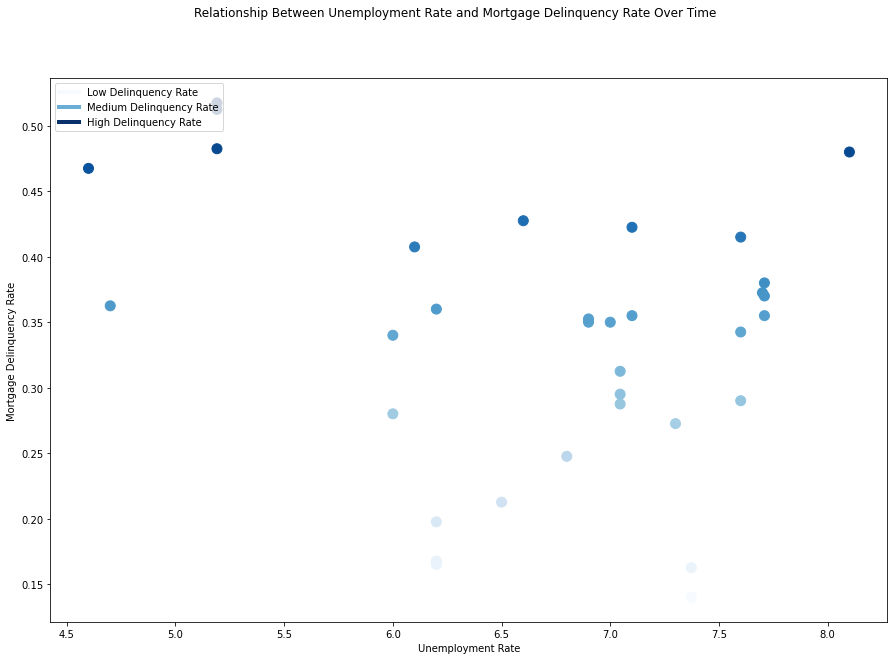

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D

plt.figure(figsize=(15, 10))
# Create a color map based on the "Mortgage Delinquency Rate" column
colors = final_cleaned_dataset['Mortgage_delinquency_rate']
cmap = plt.cm.get_cmap('Blues')

# Plot the scatter plot with the color map
plt.scatter(final_cleaned_dataset['Unemployment_Rate'], final_cleaned_dataset['Mortgage_delinquency_rate'], c=colors, cmap=cmap, s=100)

# Add labels and title
plt.xlabel('Unemployment Rate')
plt.ylabel('Mortgage Delinquency Rate')
plt.suptitle('Relationship Between Unemployment Rate and Mortgage Delinquency Rate Over Time')

# Create a custom legend
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

plt.legend(custom_lines, ['Low Delinquency Rate', 'Medium Delinquency Rate', 'High Delinquency Rate'], loc='upper left')

# Add hover information to show the values for Unemployment Rate and Mortgage Delinquency Rate
def show_values_on_hover(event):
    for idx, point in enumerate(event.artist.get_offsets()):
        x, y = point.xdata, point.ydata
        annot = plt.annotate("(%.2f, %.2f)" % (x, y),
                             (x, y),
                             textcoords="offset points",
                             xytext=(-15,-10),
                             ha='center',
                             fontsize=8,
                             bbox=dict(boxstyle="round,pad=0.3",
                                       fc="yellow", alpha=0.5),
                             arrowprops=dict(arrowstyle="->",
                                             connectionstyle="arc3,rad=0"))
        annot.set_visible(True)
    plt.draw()

plt.gcf().canvas.mpl_connect("motion_notify_event", show_values_on_hover)

# Show the plot
plt.show()

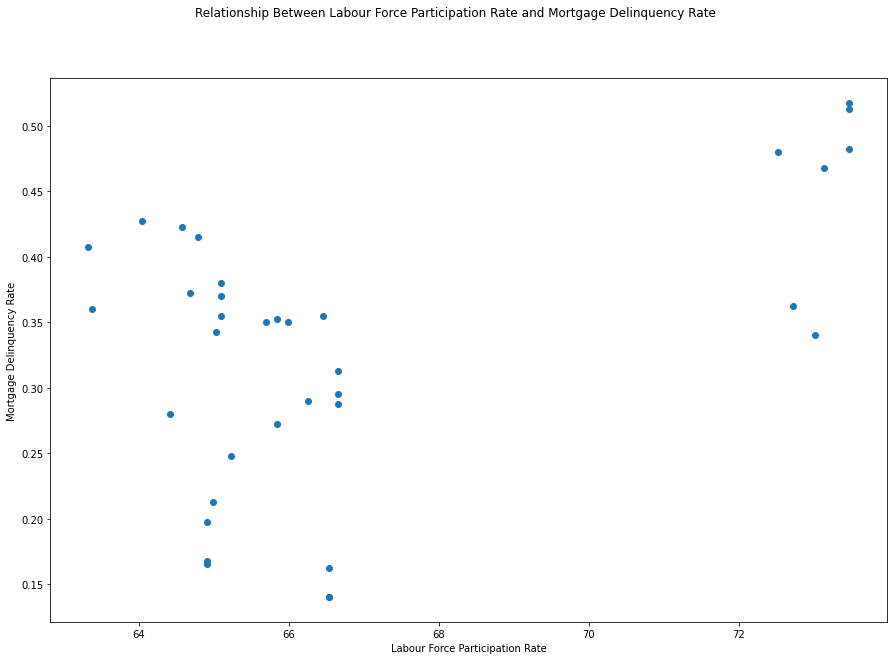

In [ ]:
plt.figure(figsize=(15, 10))
# Create a scatter plot
plt.scatter(final_cleaned_dataset['Labour_Force_Participation_Rate'], final_cleaned_dataset['Mortgage_delinquency_rate'])

# Add labels and title
plt.xlabel('Labour Force Participation Rate')
plt.ylabel('Mortgage Delinquency Rate')
plt.suptitle('Relationship Between Labour Force Participation Rate and Mortgage Delinquency Rate')

# Show the plot
plt.show()

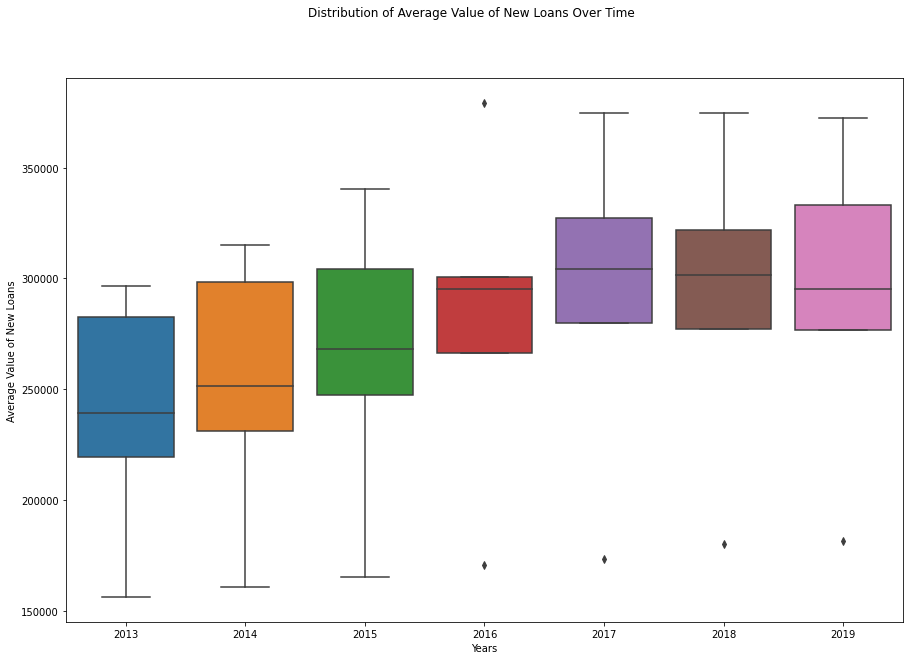

In [ ]:
# Plot the box plot

plt.figure(figsize= (15,10))
sns.boxplot( x=final_cleaned_dataset['Years'], y=final_cleaned_dataset['Average_Value_New_Loans'])

# Add labels and title
plt.xlabel('Years')
plt.ylabel('Average Value of New Loans')
plt.suptitle('Distribution of Average Value of New Loans Over Time')


# Show the plot
plt.show()

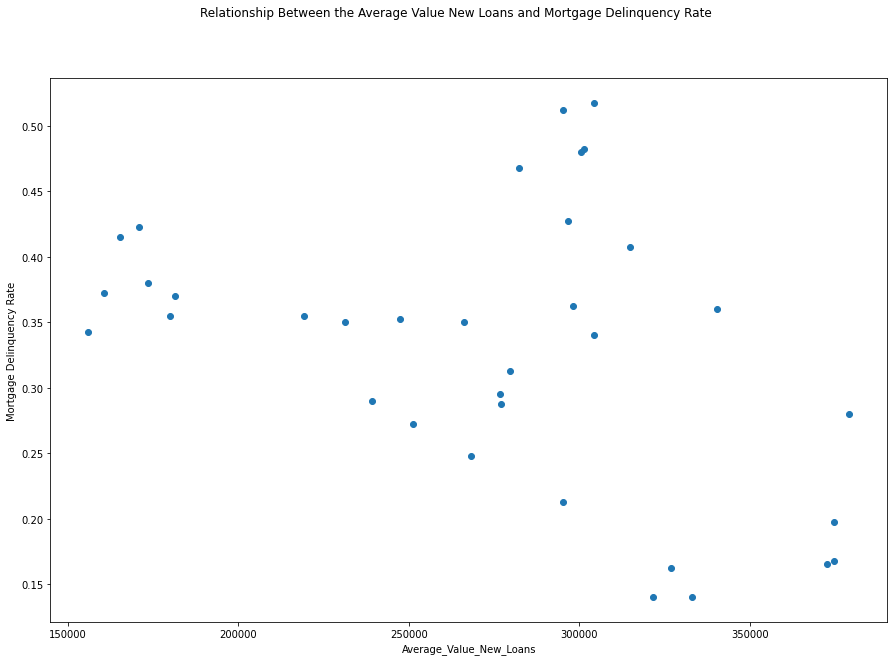

In [164]:
plt.figure(figsize=(15, 10))
# Create a scatter plot
plt.scatter(final_cleaned_dataset['Average_Value_New_Loans'], final_cleaned_dataset['Mortgage_delinquency_rate'])

# Add labels and title
plt.xlabel('Average_Value_New_Loans')
plt.ylabel('Mortgage Delinquency Rate')
plt.suptitle('Relationship Between the Average Value New Loans and Mortgage Delinquency Rate')

# Show the plot
plt.show()

In [ ]:
# Scale the data
scaler = StandardScaler()
features=scaler.fit_transform(final_cleaned_dataset.drop(['Mortgage_delinquency_rate'], axis=1))

In [ ]:
# Split the data into features and target
#features= MF_df_scaled.drop(['Mortgage_delinquency_rate'], axis=1)
target=final_cleaned_dataset['Mortgage_delinquency_rate']

In [ ]:
# Split the data into training and testing sets
X_train,X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [ ]:
# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Evaluate the model on the testing set
y_pred = model.predict(X_test)

In [ ]:
# Print accuracy
accuracy = model.score(X_test, y_test)
print("Accuracy: ", accuracy)

Accuracy:  0.9532126479832894


In [135]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate predictions using your model on the test data
y_pred = model.predict(X_test)

# Calculate mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R-Squared:", r2)

Mean Absolute Error: 0.024642152197242136
Mean Squared Error: 0.0007544818579164096
R-Squared: 0.9532126479832894


In [136]:
from sklearn.ensemble import RandomForestRegressor

# Create the model object
rfr = RandomForestRegressor()

# Fit the model to your training data
rfr.fit(X_train, y_train)

# Predict values for your test data
y_pred = model.predict(X_test)

In [140]:
# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)

Mean Absolute Error: 0.024642152197242136
Mean Squared Error: 0.0007544818579164096
Root Mean Squared Error: 0.027467833149274982
R-Squared: 0.9532126479832894


In [147]:
# Convert features to a pandas DataFrame
features_df = pd.DataFrame(features, columns=final_cleaned_dataset.drop(['Mortgage_delinquency_rate'], axis=1).columns)

# Extract the feature importance values
importance = model.feature_importances_

# Convert the numpy array to a pandas DataFrame
importance_df = pd.DataFrame(importance, index=features_df.columns, columns=['Importance'])

# Sort the dataframe by Importance in descending order
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Display the feature importance dataframe
print(importance_df)

                                        Importance
Residential_Mortgage_Arrears_Rates        0.864099
Real_Median_Household_Income              0.051264
Real_Disposable_Income_Percent_Change     0.029022
Average_Value_New_Loans                   0.024553
Consumer_Price_Index_Percent_Change       0.010555
Labour_Force_Participation_Rate           0.008169
Unemployment_Rate                         0.006269
Years                                     0.006068


In [158]:
# Drop the 'Years','Labour_Force_Participation_Rate','Unemployment_Rate','Residential_Mortgage_Arrears_Rates'features
features_df = final_cleaned_dataset.drop(['Years', 'Labour_Force_Participation_Rate', 'Unemployment_Rate', 'Residential_Mortgage_Arrears_Rates' ], axis=1)

In [159]:

# Scale the features using StandardScaler
scaler = StandardScaler()
features = scaler.fit_transform(final_cleaned_dataset.drop(['Mortgage_delinquency_rate'], axis=1))

# Split the data into features and target
target = final_cleaned_dataset['Mortgage_delinquency_rate']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the model on the training data
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the root mean squared error
rmse = np.sqrt(mse)

# Calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# Print the results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-Squared:", r2)

Mean Absolute Error: 0.03519285714285691
Mean Squared Error: 0.0015521007142857003
Root Mean Squared Error: 0.03939670943474468
R-Squared: 0.9037502602312824
